# Bruteforce for Maxcut problem

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import pandas as pd
import seaborn as sns

## Graph generating

In [2]:
def generate_random_graph(n_nodes=8, p=0.5, seed=None):
    G = nx.erdos_renyi_graph(n_nodes, p, seed=seed)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = np.random.randint(1, 10)
    return G

## Algorithm

In [3]:
def brute_force_maxcut(G):
    n = G.number_of_nodes()
    nodes = list(G.nodes())
    best_cut = None
    best_value = -np.inf
    for bits in itertools.product([0, 1], repeat=n):
        cut_value = 0
        for u, v in G.edges():
            if bits[nodes.index(u)] != bits[nodes.index(v)]:
                cut_value += G.edges[u, v]['weight']
        if cut_value > best_value:
            best_value = cut_value
            best_cut = bits
    return best_cut, best_value

## Visualization

In [4]:
# Visualization
def plot_cut(G, cut):
    pos = nx.spring_layout(G, seed=42)
    colors = ['red' if cut[i] else 'blue' for i in range(len(cut))]
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Brute Force Max-Cut")
    plt.show()

## Test of functionality

Best cut value: 77


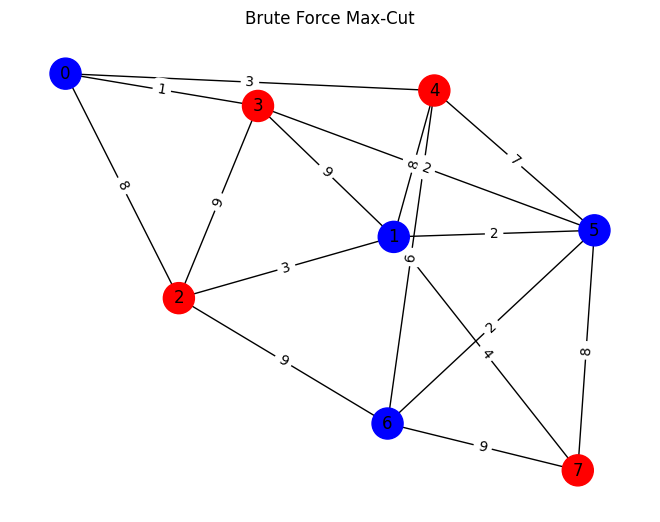

In [5]:
G = generate_random_graph(n_nodes=8, p=0.5, seed=42)
cut, value = brute_force_maxcut(G)
print(f"Best cut value: {value}")
plot_cut(G, cut)

## Experiments

In [ ]:
def run_brute_experiment(sizes, edge_prob=0.5, target_time=420.0):
    all_cut_values = []
    all_times = []
    for idx, n_nodes in enumerate(sizes):
        G = generate_random_graph(n_nodes=n_nodes, p=edge_prob, seed=idx)
        cut_values = []
        run_times = []
        start_time = time.time()
        while time.time() - start_time < target_time:
            t0 = time.time()
            cut, value = brute_force_maxcut(G)
            t1 = time.time()
            cut_values.append(value)
            run_times.append(t1 - t0)
            # Only one run per graph is needed for brute force, break
            break
        all_cut_values.append(cut_values)
        all_times.append(run_times)
        print(f"Size: {n_nodes} | Best Cut: {max(cut_values)} | Time: {sum(run_times):.2f}s")
    return all_cut_values, all_times

sizes = [6, 7, 8, 9, 10, 11, 12]  # Keep small!
cut_values, run_times = run_brute_experiment(sizes, edge_prob=0.5, target_time=60.0)

# Prepare data for violin plot
df = pd.DataFrame({
    'Graph Size': sum([[size]*len(vals) for size, vals in zip(sizes, cut_values)], []),
    'Cut Value': sum(cut_values, [])
})

plt.figure(figsize=(10,6))
sns.violinplot(x='Graph Size', y='Cut Value', data=df, inner='quartile', scale='width')
plt.title('Brute Force Max-Cut Performance')
plt.xlabel('Graph Size (nodes)')
plt.ylabel('Cut Value')
plt.show()

In [ ]:
df.to_csv("brute_force_experiment_results.csv", index=False)